### 必要モジュールのインポート

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import cv2
import random
import kwcoco, kwplot
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.axes_grid1 import ImageGrid

# 1枚の画像を表示する関数
def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

# 複数枚の画像を表示する関数
def show_imgs(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.7):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(cv2.cvtColor(imgs_dict[img_key], cv2.COLOR_BGR2RGB))
            grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None


### データセットを読み込んで情報を確認する

In [2]:
coco_path = Path("../__datasets__/sample_coco_train2017/instances_train2017.json")
coco_img_root = Path("../__datasets__/sample_coco_train2017/")

coco = kwcoco.CocoDataset(data=coco_path, img_root=coco_img_root)

print(f"画像の枚数： {coco.n_images}")
print(f"カテゴリー数： {coco.n_cats}")
print(f"アノテーション数： {coco.n_annots}")

画像の枚数： 100
カテゴリー数： 80
アノテーション数： 712


### 画像を表示する

(<Figure size 320x240 with 1 Axes>, <Axes: >)

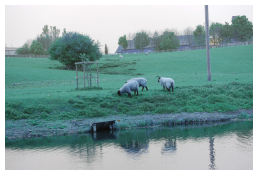

In [3]:
# 画像のIDを取得
sample_imgId = random.choice(list(coco.imgs.keys()))

# 画像を取得
img = coco.load_image(sample_imgId)

# 画像を表示
show_img(img, dpi=50)

### 表示される色味が違う

画像処理系で利用するライブラリにOpenCVというものがある。  
このOpenCVでは、画像の色表現に「BGR」を採用している。  
そのため、一般的に利用される「RGB」形式の画像を表示するアプリケーションでは赤と青が入れ替わったような色味になってしまう。  
（例：B:G:R=255:0:0の画像は「青」が表示されはずだが、一般的なアプリケーションでは「赤」が表示されてしまう）  
そこで、この色の入れ替わりが発生しないように、少し修正を加える必要がある。  

参考：[OpenCV のピクセル形式が BGR である理由](https://qiita.com/yoya/items/bfef7404ded22649a2af)

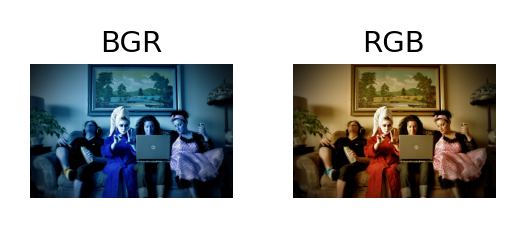

In [4]:
# 画像のIDを取得
sample_imgId = random.choice(list(coco.imgs.keys()))

# 画像を取得
img_BGR = coco.load_image(sample_imgId)
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

# 辞書型で格納
imgs = {}
imgs["BGR"] = img_BGR
imgs["RGB"] = img_RGB

# 画像を表示
show_imgs(imgs, dpi=300)

### アノテーションを描画して画像を表示する(ライブラリを利用して表示)

loading image
loaded image


<Axes: title={'center': 'gid=188009 000000188009.jpg'}>

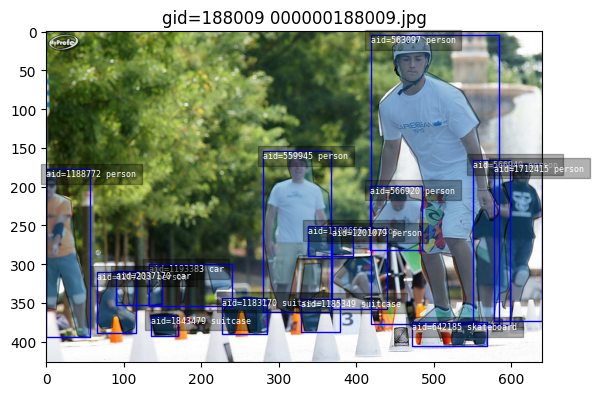

In [13]:
# 画像のIDを取得
sample_imgId = random.choice(list(coco.imgs.keys()))

kwplot.autompl()
coco.show_image(gid=sample_imgId)

### アノテーションを描画して画像を表示する(画像データが欲しい場合)

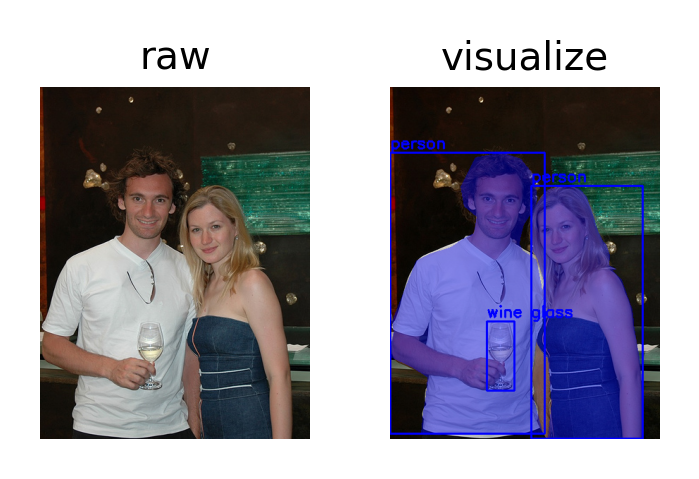

In [17]:
# 画像のIDを取得
sample_imgId = random.choice(list(coco.imgs.keys()))

# 画像を取得
img = coco.load_image(sample_imgId)

# アノテーションを描画した画像を取得
draw_img = coco.draw_image(sample_imgId)

# 辞書型で格納
imgs = {}
imgs["raw"] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgs["visualize"] = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

# 画像を表示
show_imgs(imgs, dpi=400)

### たくさん表示する

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


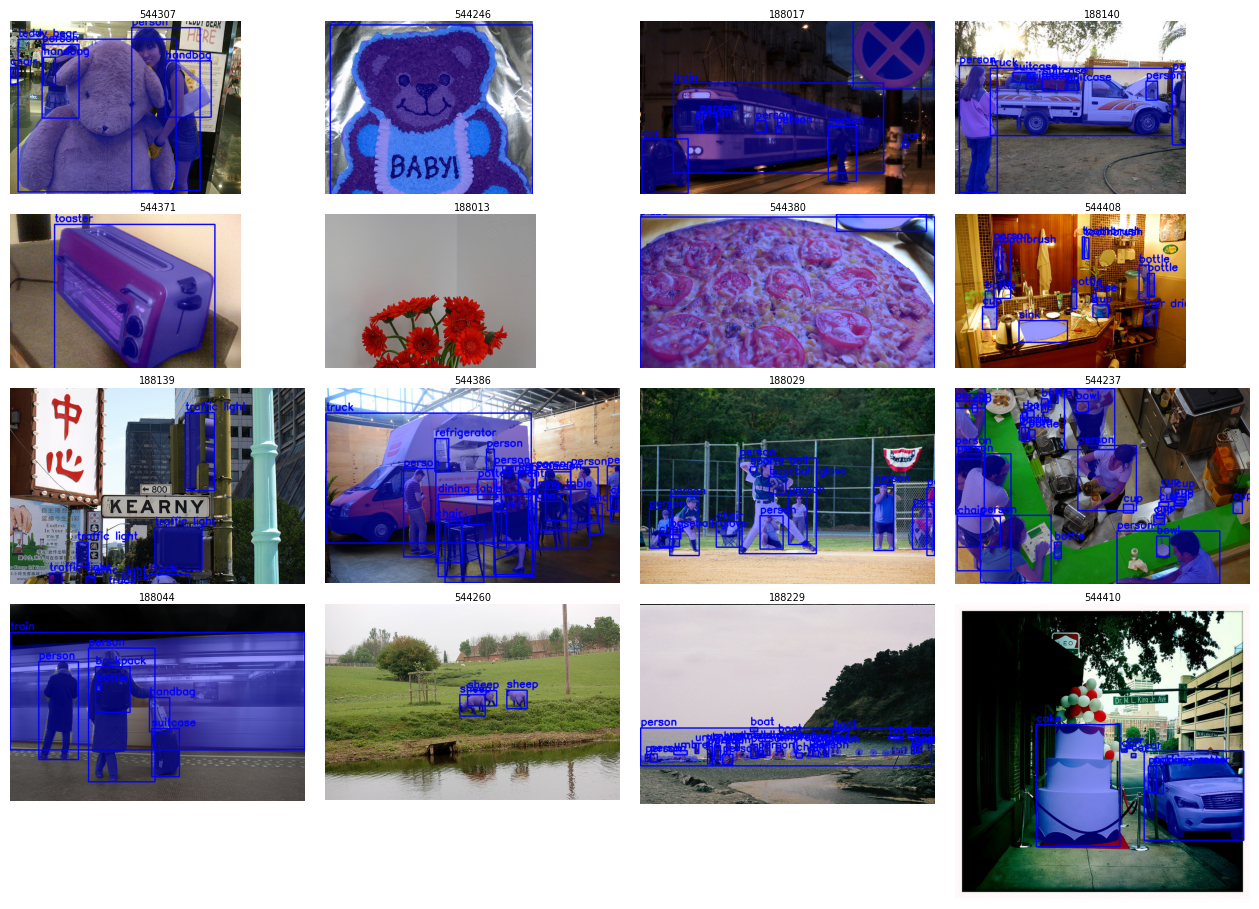

In [21]:
# 画像のIDを複数取得
sample_imgIds = random.sample(list(coco.imgs.keys()), 16)

imgs = {}
for imgId in sample_imgIds:
    imgs[imgId] = cv2.cvtColor(coco.draw_image(imgId), cv2.COLOR_BGR2RGB)

# 画像を表示
show_imgs(imgs, ncol=4, dpi=100)